In [1]:
# For analysis and numerical functions 
import pandas as pd 
import numpy as np 

# For Vizualization 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [2]:
df=pd.read_csv('Udupi_Mallige_Pricing_Report_22072024112559.csv')

In [3]:
df.head()

,Date,Mallige,Jaaji
0,2018-10-02,170,0
1,2018-10-01,210,0
2,2018-10-03,310,0
3,2018-10-04,290,0
4,2018-10-07,660,0


In [4]:
df=df.drop('Jaaji',axis=1)

In [5]:
df.head()

,Date,Mallige
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear

In [8]:
df.tail(10)

,Date,Mallige,Year,Month,Day,DayOfWeek,DayOfYear
2089,2024-07-12,730,2024,7,12,4,194
2090,2024-07-13,1050,2024,7,13,5,195
2091,2024-07-14,950,2024,7,14,6,196
2092,2024-07-15,1050,2024,7,15,0,197
2093,2024-07-16,430,2024,7,16,1,198
2094,2024-07-17,430,2024,7,17,2,199
2095,2024-07-18,430,2024,7,18,3,200
2096,2024-07-19,470,2024,7,19,4,201
2097,2024-07-20,470,2024,7,20,5,202
2098,2024-07-21,430,2024,7,21,6,203


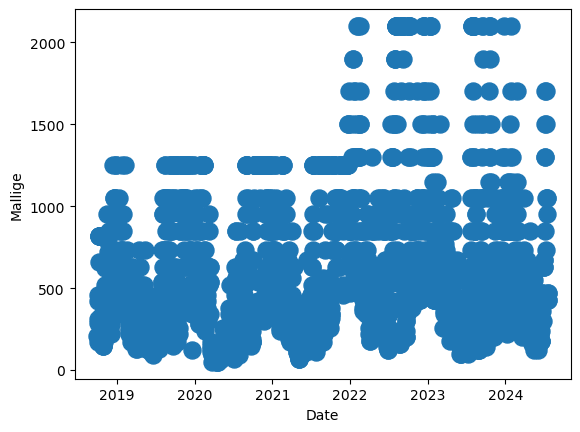

In [9]:
df.plot.scatter(x = 'Date', y = 'Mallige', s = 150); 

<Axes: >

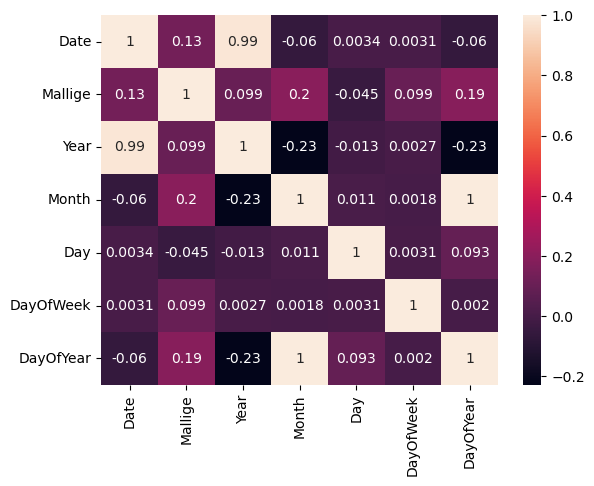

In [10]:
sns.heatmap(data=df.corr(),annot=True)

In [11]:
df=df.drop('Date',axis=1)

<Axes: xlabel='Month', ylabel='Mallige'>

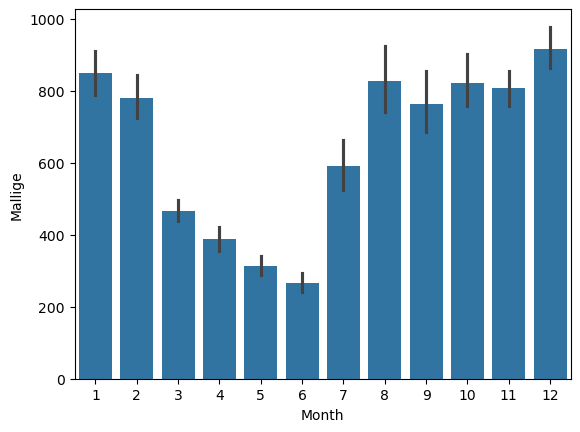

In [12]:
sns.barplot(x=df['Month'],y=df['Mallige'],data=df)

<Axes: >

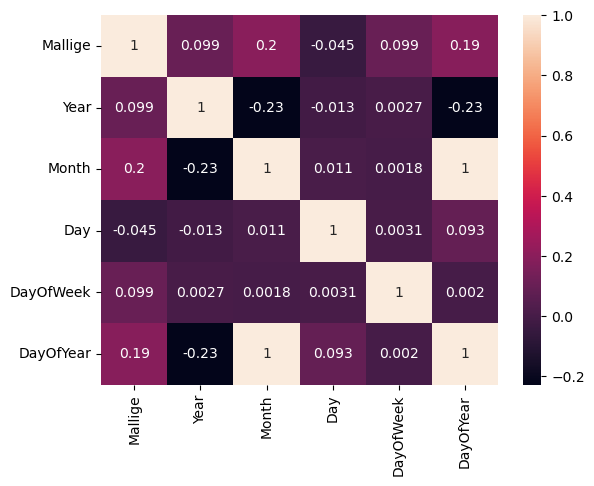

In [13]:
sns.heatmap(data=df.corr(),annot=True)

In [14]:
df.isnull().sum()

Mallige      0
Year         0
Month        0
Day          0
DayOfWeek    0
DayOfYear    0
dtype: int64

In [15]:
df.nunique()

Mallige       62
Year           7
Month         12
Day           31
DayOfWeek      7
DayOfYear    366
dtype: int64

In [16]:
df.shape

(2099, 6)

In [17]:
df.columns

Index(['Mallige', 'Year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear'], dtype='object')

In [18]:
x=df.drop('Mallige',axis=1)

In [19]:
y=df['Mallige']

In [20]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can try different degrees
x_poly = poly.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=100)

In [22]:
print(x_train.shape)
print(x_test.shape)

(1679, 21)
(420, 21)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# Predict
y_pred = model.predict(x_test)

In [25]:
# Evaluate the model
r2_score = model.score(x_test, y_test)
print(f'R² score: {r2_score:.4f}')

R² score: 0.3274


In [26]:
# Save the model
with open('jasmine_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the PolynomialFeatures
with open('poly_features.pkl', 'wb') as file:
    pickle.dump(poly, file)

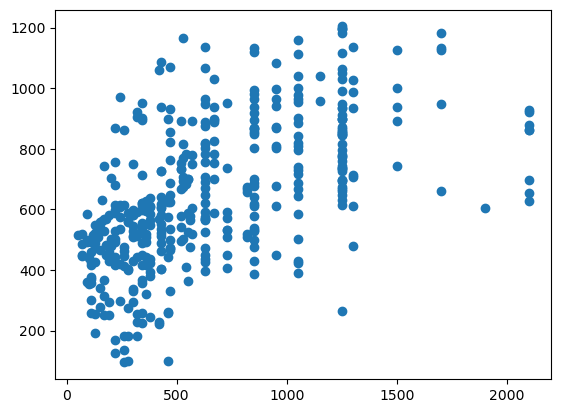

In [27]:
plt.scatter(y_test,y_pred)